In [1]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor

%matplotlib notebook
import matplotlib.pyplot as plt

from empiricalgalo import utils


%load_ext autoreload
%autoreload 2

In [2]:
# load some example data
data = np.load("/Users/richard/Projects/data/HAGNmatch.npy")
mask = (data["H_level"] == 1) & (data["H_mhalo"] > 1e10) & (data["G_mgal"] > 1e9)
data = data[mask]

# consider these features
features = ["H_mhalo", "H_spin", "H_concentration", "H_potential"]
# and this target
target = "G_mgal"
# and these labels are to be taken a logarithm of
log_labels = ["H_mhalo", "H_spin", "H_rvir", "H_concentration", "G_mgal"]

# use ExtraTrees as an example
# (for better results consider some hyperparamater selection)
model = ExtraTreesRegressor(n_estimators=128, min_samples_split=16,
                            max_samples=0.75, n_jobs=6)

In [3]:
# Calculate the incremental importances

importances = utils.incremental_importance(data, features, target, model, log_labels)
print()
print(importances)

Iteration 1. Found ordering: ['H_mhalo'], remaining: ['H_spin', 'H_concentration', 'H_potential']
Iteration 2. Found ordering: ['H_mhalo', 'H_concentration'], remaining: ['H_spin', 'H_potential']
Iteration 3. Found ordering: ['H_mhalo', 'H_concentration', 'H_potential'], remaining: ['H_spin']
Iteration 4. Found ordering: ['H_mhalo', 'H_concentration', 'H_potential', 'H_spin'], remaining: []

{'ordered_features': ['H_mhalo', 'H_concentration', 'H_potential', 'H_spin'], 'scores': [0.8684961353629667, 0.925772619402071, 0.9294397625483533, 0.9309440947372842], 'correlations': [SpearmanrResult(correlation=0.9009008956618642, pvalue=0.0), SpearmanrResult(correlation=0.39381366680229446, pvalue=0.0), SpearmanrResult(correlation=0.09441959165931553, pvalue=6.043383889335947e-21), SpearmanrResult(correlation=-0.05067758790802358, pvalue=4.868208983393562e-07)]}


<IPython.core.display.Javascript object>


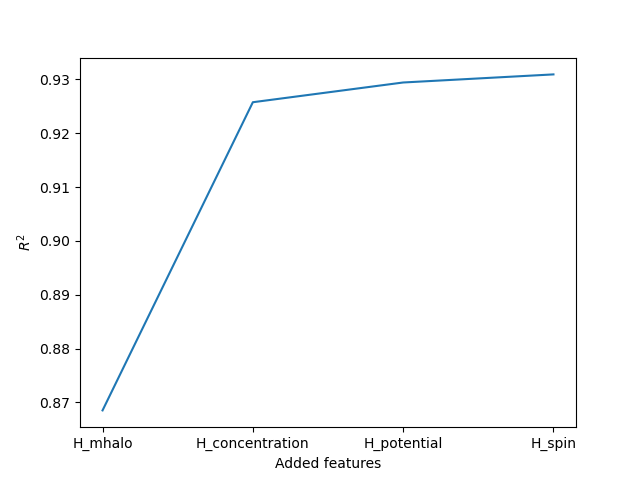

In [4]:
plt.figure()
plt.plot(importances["scores"])
plt.ylabel("$R^2$")
plt.xlabel("Added features")
plt.xticks(range(len(importances["ordered_features"])), labels=importances["ordered_features"])
plt.show()